<a href="https://colab.research.google.com/github/chiedozieokoro/L00163379-IDS-for-SME/blob/main/L00163379_IDS_for_SMEs__KDD99_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intrusion Detection System for SMEs using Machine Learning Algorithms

# Chiedozie Hector Okoro - L00163379

# MSC in Computing in Cybersecurity Research

#KDD99 Dataset

In [ ]:
#Importing Libraries and Dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.stats import zscore
import seaborn as sns

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Nominating a column to the features to seperate them for easy ML process
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""



In [ ]:
#creating a list of strings and appending element to a column
columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())
       
#Appending the string target to a column list
columns.append('target')
print(columns)
print(len(columns))

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'target']
42


In [ ]:
#This code will open the file specified by the file path, read the contents of the file, and then print the contents to the console.

with open("/content/drive/MyDrive/KDD-99/AI-pentest/AI-pentest/training_attack_types",'r') as f:
 print(f.read())
   

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [ ]:
# Mapping attack types to attack categories
attacks_types = { 
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [ ]:
#read file in path and save to a pandas dataframe
path = "/content/drive/MyDrive/KDD-99/AI-pentest/AI-pentest/kddcup.data_10_percent.gz"
df = pd.read_csv(path,names=columns)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

#Display the first 5 rows of the dataframe
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [ ]:
#Value count of each attack type
df['Attack Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

In [ ]:
#return data type of each column in the dataframe
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [ ]:
#return the sum of boolean values in each column
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

# **Feature Extraction **

In [ ]:
num_cols = df._get_numeric_data().columns #get names of numeric columns in dataframe

cate_cols = list(set(df.columns)-set(num_cols)) #creates list of names of non-numeric columns in dataframe
cate_cols.remove('target') #remove target from non-numeric columns
cate_cols.remove('Attack Type') #remove attack type from non-numeric columns

cate_cols

['protocol_type', 'service', 'flag']

In [ ]:
#Visualization of features
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

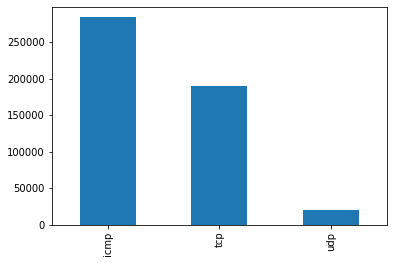

In [ ]:
bar_graph('protocol_type')

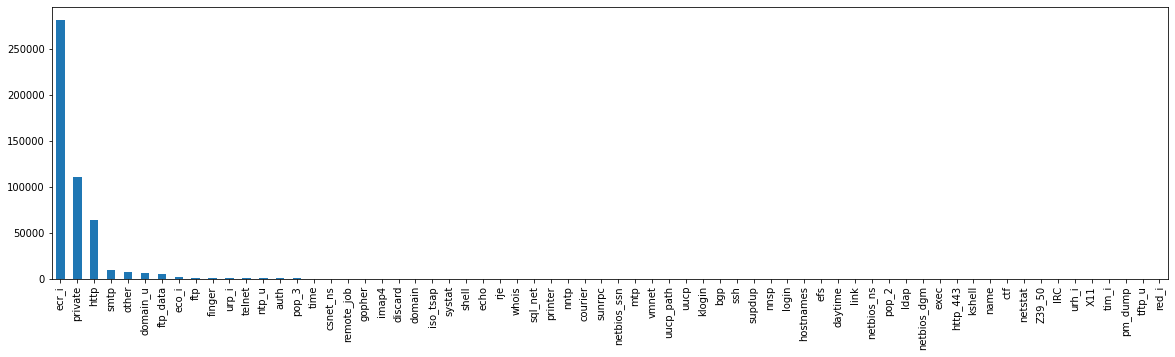

In [ ]:
plt.figure(figsize=(20,5))
bar_graph('service')

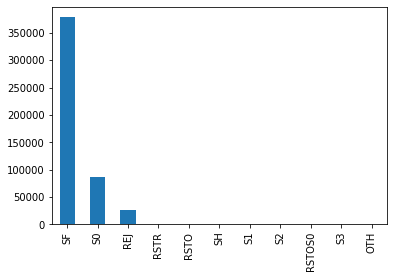

In [ ]:
bar_graph('flag')

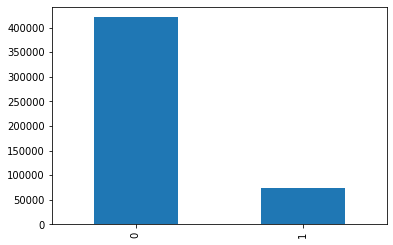

In [ ]:
bar_graph('logged_in')

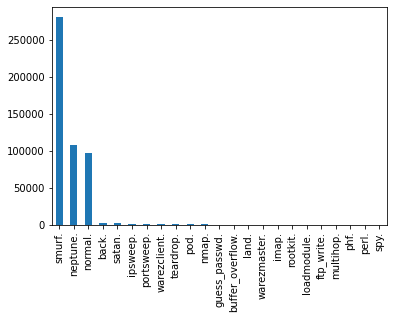

In [ ]:
bar_graph('target')


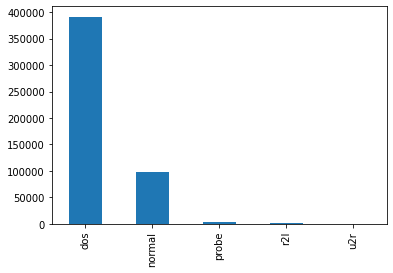

In [ ]:
bar_graph('Attack Type')

<ipython-input-19-6ac435f7217b>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns where there is something messing NaN


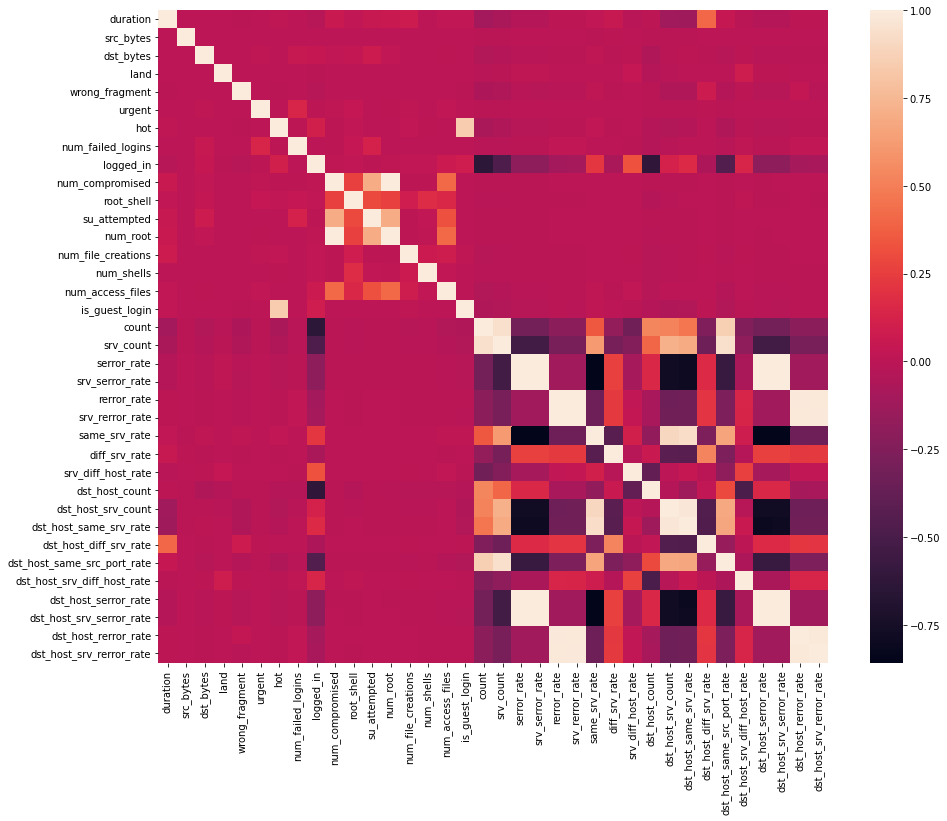

In [ ]:
df = df.dropna('columns') # drop columns where there is something messing NaN

df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values

corr = df.corr() #calculate pairwise correlation

plt.figure(figsize=(15,12)) #figure size

sns.heatmap(corr) #create heatmap


plt.show() #plot heatmap

In [ ]:
#The below codes calculate the correlation coefficient between features to determine their linear relationship

df['num_root'].corr(df['num_compromised'])

0.9938277978737916

In [ ]:
df['dst_host_srv_count'].corr(df['serror_rate'])

-0.7752726301373145

In [ ]:
df['srv_serror_rate'].corr(df['serror_rate'])

0.998361507272553

In [ ]:
df['srv_count'].corr(df['count'])

0.9436670688882645

In [ ]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

0.9947309539818242

In [ ]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count']) 

0.9736854572953835

In [ ]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

0.9981559173373293

In [ ]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

0.9848038371110285

In [ ]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])

0.9278080342690969

In [ ]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])

0.8989546630323716

In [ ]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])

0.944926367678324

In [ ]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

0.9986729680104371

In [ ]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])

0.9978353003739603

In [ ]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

0.997849248567986

In [ ]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])

0.999304109185027

In [ ]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])

0.986994792495618

In [ ]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])

0.9821663427308264

In [ ]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])

0.9851995540751695

In [ ]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

0.9865705438845764

In [ ]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [ ]:
df.head() #Display the first 5 rows of the dataframe

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [ ]:
df.shape #returns the dimensions of the dataframe

(494021, 33)

In [ ]:
df.columns #access the column labels of the dataframe

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

In [ ]:
df['protocol_type'].value_counts() #returns the value count of the protocol type

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [ ]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [ ]:
df['flag'].value_counts() #returns the value count of the flag

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [ ]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [ ]:
df.head(50000) #return the first 50000 rows of the dataframe

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,http,0,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,http,0,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,http,0,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,http,0,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,http,0,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,ecr_i,0,1032,0,0,0,0,0,...,1.0,0.0,0.0,255,255,0.0,1.00,0.0,smurf.,dos
49996,0,0,ecr_i,0,1032,0,0,0,0,0,...,1.0,0.0,0.0,255,255,0.0,1.00,0.0,smurf.,dos
49997,0,0,ecr_i,0,1032,0,0,0,0,0,...,1.0,0.0,0.0,255,255,0.0,1.00,0.0,smurf.,dos
49998,0,0,ecr_i,0,1032,0,0,0,0,0,...,1.0,0.0,0.0,255,255,0.0,1.00,0.0,smurf.,dos


In [ ]:
df.drop('service',axis = 1,inplace= True) #here we delete service because as you see its a non numirical value and there is no need to map it  

In [ ]:
df.shape #The shape attribute of a pandas DataFrame returns a tuple representing the dimensions of the DataFrame. The first element of the tuple will be the number of rows, and the second element will be the number of columns.

(494021, 32)

In [ ]:
df.tail()#Here we are trying to view the last 5 rows of the DataFrame

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
494016,0,1,0,310,1881,0,0,0,0,0,...,1.0,0.0,0.40,86,255,0.0,0.01,0.05,normal.,normal
494017,0,1,0,282,2286,0,0,0,0,0,...,1.0,0.0,0.00,6,255,0.0,0.17,0.05,normal.,normal
494018,0,1,0,203,1200,0,0,0,0,0,...,1.0,0.0,0.17,16,255,0.0,0.06,0.05,normal.,normal
494019,0,1,0,291,1200,0,0,0,0,0,...,1.0,0.0,0.17,26,255,0.0,0.04,0.05,normal.,normal
494020,0,1,0,219,1234,0,0,0,0,0,...,1.0,0.0,0.14,6,255,0.0,0.17,0.05,normal.,normal


In [ ]:
df.dtypes #return the data type of each column in the dataframe

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count           

#  **MODELLING**

In [ ]:
#Import requirements for modelling

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler


In [ ]:
# Remove target column from the dataframe
df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

# Scale features
sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(494021, 31)
(395216, 30) (98805, 30)
(395216, 1) (98805, 1)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier #Here we import the RF classifier


In [ ]:
clfr = RandomForestClassifier(n_estimators=30) #Hyperparameter optimization. assign 30 trees to be trained for RF 

In [ ]:
#Using fit method to train the RF classifier
start_time = time.time()
clfr.fit(X_train, y_train.values.ravel())
end_time = time.time()

In [ ]:
print("Training time: ",end_time-start_time) #Here we print the training time

Training time:  8.195525407791138


In [ ]:
#Using predict method to make predictions
start_time = time.time()
y_test_pred = clfr.predict(X_train)
end_time = time.time()

In [ ]:
print("Testing time: ",end_time-start_time) #Here we print the testing time

Testing time:  0.9256100654602051


In [ ]:
print("Train score is:", clfr.score(X_train, y_train)) #Here we print the train score
print("Test score is:",clfr.score(X_test,y_test)) # Here we print the test score

Train score is: 0.9999772276426055
Test score is: 0.9996154040787409


**SUPPORT VECTOR MACHINE (SVM)**

In [ ]:
from sklearn.svm import SVC #Here we import the SVM classifier

In [ ]:
clfs = SVC(gamma = 'scale') #Hyperparameter optimization for SVM

In [ ]:
#Using fit method to train SVM
start_time = time.time()
clfs.fit(X_train, y_train.values.ravel())
end_time = time.time()

In [ ]:
print("Training time: ",end_time-start_time) #Here we print the training time for SVM

Training time:  551.9801752567291


In [ ]:
#We use predict to make predictions
start_time = time.time()
y_test_pred = clfs.predict(X_train)
end_time = time.time()

In [ ]:
print("Testing time: ",end_time-start_time) #Here we print the testing time for SVM

Testing time:  160.49844217300415


In [ ]:
print("Train score is:", clfs.score(X_train, y_train)) #Here we print the train score for SVM
print("Test score is:",clfs.score(X_test,y_test)) #Here we print the test score for SVM

Train score is: 0.9987804137484312
Test score is: 0.9987348818379637


# **Experiments**

**TRAINING ACCURACY**

<BarContainer object of 2 artists>

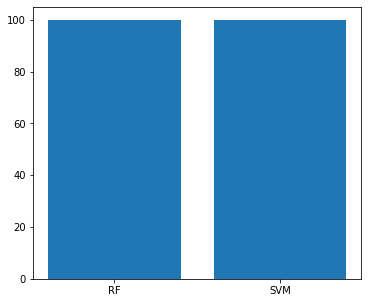

In [ ]:
#This code will create a bar plot with two bars, one for each classifier. The height of each bar will be determined by the corresponding training accuracy value.
names = ['RF','SVM']
values = [99.997,99.875]
f = plt.figure(figsize=(20,5),num=10)
plt.subplot(131)
plt.bar(names,values)

**TESTING ACCURACY**

<BarContainer object of 2 artists>

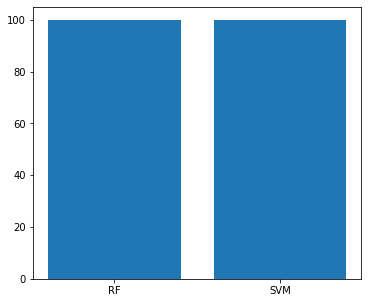

In [ ]:
#This code will create a bar plot with two bars, one for each classifier. The height of each bar will be determined by the corresponding testing accuracy value.
names = ['RF','SVM']
values = [99.966,99.879]
f = plt.figure(figsize=(20,5),num=10)
plt.subplot(131)
plt.bar(names,values)

**TRAINING TIME**

<BarContainer object of 2 artists>

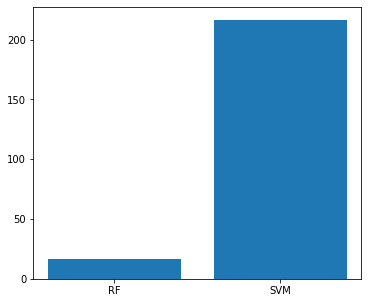

In [ ]:
#This code will create a bar plot with two bars, one for each classifier. The height of each bar will be determined by the corresponding training time value.
names = ['RF','SVM']
values = [16.35494,216.53651,]
f = plt.figure(figsize=(20,5),num=10)
plt.subplot(131)
plt.bar(names,values)

**TESTING TIME**

<BarContainer object of 2 artists>

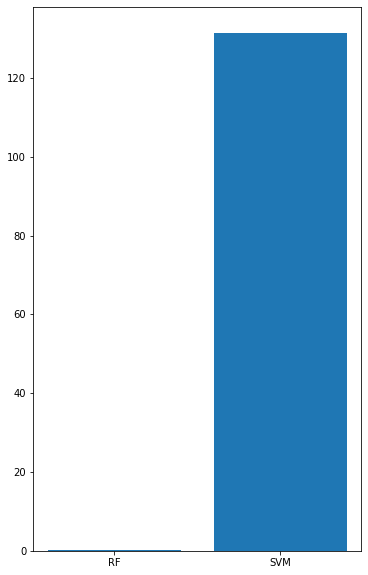

In [ ]:
#This code will create a bar plot with two bars, one for each classifier. The height of each bar will be determined by the corresponding testing time value.
names = ['RF','SVM']
values = [0.12128,131.44433]
f = plt.figure(figsize=(20,10),num=10)
plt.subplot(131)
plt.bar(names,values)